In [5]:
import csv
import numpy as np
# import xlsxwriter
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from natsort import natsorted
import sys
#from tabulate import tabulate
import os
from matplotlib.animation import FuncAnimation
# from xlsxwriter import Workbook
# get_ipython().run_line_magic('matplotlib', 'inline')
import glob
import pickle
import shutil
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [11]:
def label(x,y,a,b,pur="all"):
    plt.xlabel(x,fontsize=18)
    plt.ylabel(y,fontsize=18)
    if pur=="all":
        plt.rcParams['figure.figsize'] = [a,b]
    elif pur=="chi2":
        plt.title("Chi2 Analysis, S-%s, Channel %s"%(a,b), fontsize=20)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    return 

In [5]:
np.round(155.234, 2)

155.23

In [9]:
N_det = 13
Det_Comb=21

energyThreshold = 100
timeWindow=5e-7
Date="103024"
         #Not required if you are doing the full run. 
#first cut_data event or 2nd, Ex: index=0 means collecting first 60 second of data and 
                                 #index=1 means collecting second 60 second of data and so on...     
# run_index=0      #int(sys.argv[1])    #Type the index of run mentioned in the data file, required while taking multiple dataset 


activity = 0.8
cut_data=3600               #Select the required second of data
read_folder_all=glob.glob("../ASCID_efficiency/DAQ/CsI_Na22_Containment_test*")                   #reading data folder
Total_folder = len(read_folder_all)
read_folder_all.sort(key=lambda x: os.stat(x).st_ctime)
folder_index = 1
read_folder= read_folder_all[folder_index]            #glob.glob("../RUN4/Sc46/DAQ/*")
save_folder="..//ASCID_efficiency/Figures/Take2" 

print(f"Folder name {read_folder_all[folder_index]}")
index=0

innerChannel=np.arange(16,26)

date="%s"%(Date)
serial=np.array(["1st","2nd","3rd","4th","5th","6th", "7th", "8th"])
save_folder_each = os.path.join(save_folder, "Folder_%d"%folder_index)

Folder name ../ASCID_efficiency/DAQ\CsI_Na22_Containment_test_1


In [11]:
files = glob.glob('%s/RAW/*.CSV'%read_folder)
files=natsorted(files)#[0:26]
# files = files
# print(files)
MinTime=np.zeros(N_det)
for nf,nfile in enumerate(files):
    # nfile1 = os.path.join(folder_path, nfile)
    file = open(nfile)
    csvreader = csv.reader(file, delimiter = ';')
    header = next(csvreader)
    line_count = 0
    for row in csvreader:
        if line_count == 0:
            MinTime[nf] = float(row[2]) * 1e-12
            break
minTime=np.min(MinTime)


# In[5]:

data=[]
for j in range(3):                                     #3=channel, time, calib. energy
    b=[]
    data.append(b)
nEvent=np.zeros(len(files))
for nf,nfile in enumerate(files):
    # nfile1 = os.path.join(folder_path, nfile)
    file = open(nfile)
    csvreader = csv.reader(file, delimiter = ';')
    header = next(csvreader)
    line_count = 0
    for row in csvreader:
        if float(row[2])*1e-12 - minTime>=cut_data*index:
            data[0].append(int(row[1]) - 26)
            data[1].append(float(row[2])*1e-12 - minTime)
            data[2].append(float(row[3]))     # row[4] = Caliberated energy, row[3] = ADC energy sometime, else row[3] = Caliberated energy
            line_count += 1
            # if line_count%1000000==0:
            #     print("%d M data loaded"%int(line_count/1000000))
            if float(row[2])*1e-12 - minTime>cut_data*(index+1):
                data[0].pop()
                data[1].pop()
                data[2].pop()
                break
    nEvent[nf]=line_count-1
    print("file %d done"%nf)
nEvents=int(nEvent.sum())


Data_Time=round((data[1][nEvents-1]-data[1][0]),0)
print("Total Time for this data set is %d s"%Data_Time)

file 0 done
file 1 done
file 2 done
file 3 done
file 4 done
file 5 done
file 6 done
file 7 done
file 8 done
file 9 done
file 10 done
file 11 done
file 12 done
Total Time for this data set is 3600 s


In [12]:
data=np.array(data).T
data=data[data[:, 1].argsort()]
data=np.array(data).T

In [ ]:
time_diff = []
for j in range(nEvents-1):
    time_diff.append(data[1][j+1] - data[1][j])

In [13]:
nEvents = len(data[0])
energyPlot=[[] for _ in range(N_det)]
for i in range(nEvents):
    # if data[0][i] < 26:
    energyPlot[int(data[0][i])].extend([data[2][i]])

In [14]:
for k in range(N_det):
    bin_last= 2500 #  mean[k, 0]*1.8
    bin_start = 20  #4 if mean[k, 0] < 40 else 10
    bin_w = 2   #1 if mean[k, 0] < 40 else 2
    
    n,bins, patches=plt.hist(energyPlot[k], bins=np.arange(bin_start,bin_last,bin_w), histtype="step", label="%d events"%len(energyPlot[k]))
    label("Energy (ADC)", "Counts", 10,5)
    # plt.yscale("log")
    plt.title(r"Channel %d Energy Spectrum- 1 Hr data (Na22)"%k, fontsize=16)
    plt.savefig("%s/Pulse/Energy_Ch%d.jpg"%(save_folder_each,k))
    plt.close()

In [18]:
mean = np.zeros(7)
sigma = np.zeros(7)

In [60]:
gaus_diff=np.array([[0.4,0.1,0.2,0.2,0.6,      0.2,0,0,0.65,0.2,     0,0,0.2,1.6,0,     0.3,0,0.15,0.15,0,     0.3,0.2,0.2,0.1,0.2,0],
                    [0.2,0.1,0.2,0.2,0.8,      0,0,0.2,0.75,0.2,     0,0,0.2,2.3,0,     0.3,0,0.15,0.15,0,     0.3,0.2,0.2,0.1,0.2,0]])

# for k in range(13, 14):
k=6
bin_last=np.array([2500,2500,2500,3500,4000,3500,   4000])
bin_w=np.array([2,2,2,2,2,    2,2,2,2,2,    2,2,2,2,2,   2,2,2,2,2,  2,2,2,2,2,  2])
# n1,bins1,patches=plt.hist(SmEnergy[k], bins=np.arange(10,bin_last[k],bin_w[k])*13, histtype="step", label="%d events"%len(SmEnergy[k]))
n,bins, patches=plt.hist(energyPlot[k], bins=np.arange(60,bin_last[k],bin_w[k]), histtype="step", label="%d events"%len(energyPlot[k]))
label("Energy (ADC)", "Counts", 10,5)
plt.yscale("log")
# no[k]=n
plt.title(r"Channel %d Energy Spectrum- 5 min data (Na22)"%k, fontsize=16)

gaus_x=np.array([[600, 700, 750,  2350, 2800,          1730, 2600],
            [ 750,  950,  900,  2600, 3100,       2000,  2900]])

gaus_y=np.array([[1500, 1500, 92, 54, 102,            120, 86]
            ,[ 1700,  250, 115,  70,  130,        150,  108]])

a1, mean[k],sigma[k], fig=gaus_fit(gaus_x[0][k]-gaus_diff[0][k]*index,gaus_x[1][k]-gaus_diff[0][k]*index,bin_last[k]/3,max(n)-max(n)/10)
# a2, mean[k,1],sigma[k,1], fig=gaus_fit(gaus_y[0][k]-gaus_diff[1][k]*index,gaus_y[1][k]-gaus_diff[1][k]*index,bin_last[k]/1.5,max(n)-max(n)/2)
plt.legend(fontsize=14)
plt.savefig("%s/Pulse/Energy_Ch%d.jpg"%(save_folder_each,k))
plt.close()
print("%d done"%k)

6 done


In [8]:
mean = np.array([672.37, 835, 812.04, 2476.62, 2911.92, 1846.36, 2754.73])

In [9]:
Cal_keV = np.array([511, 511, 511, 1275, 1460, 1460, 1460])

In [15]:
mean = np.array([466, 791, 820, 962, 950, 776, 693, 658, 616, 600, 754, 503, 700])
Cal_keV = np.ones(N_det)*511

In [16]:
nEvents = len(data[0])
for j in range(nEvents):
    data[2][j]=data[2][j]/mean[int(data[0][j])]*Cal_keV[int(data[0][j])]

In [78]:
data[2][0]

703.7531284008044

In [17]:
nEvents = len(data[0])
csiCh = np.arange(7)
timeWindow = 5e-7
Sig_index=-1
eventTime=0
Timed_Energy_event=[]
for j in range(nEvents):
    if  data[1][j]>eventTime+2*timeWindow and int(data[0][j]) in csiCh and data[2][j] > 100:   #Avoiding center detector overlap
        eventTime=data[1][j]
        eventChannel=int(data[0][j])
        Ev_indx=j
        Sig_index+=1
        EventEnergy=data[2][j]
        a=[]
        a.extend([Ev_indx])
        
        while Ev_indx>0 and abs(data[1][Ev_indx-1]-eventTime)<=timeWindow:
            Ev_indx-=1
            a.extend([Ev_indx])
        Ev_indx=j
        
        while Ev_indx<nEvents-1 and abs(data[1][Ev_indx+1]-eventTime)<=timeWindow:
            Ev_indx+=1    
            a.extend([Ev_indx])
        a = np.unique(np.sort(a)) # a contains the index within the defined coincidence window
        Timed_Energy_event.extend([a])
    if j %1000000 == 0:
        print("%d M done"%int(j/1000000))
# Timed_Energy_event = Timed_Energy_event
# Timed_Energy_event=[]
print("data coincidence done")

0 M done
1 M done
2 M done
3 M done
4 M done
5 M done
6 M done
7 M done
8 M done
9 M done
10 M done
11 M done
12 M done
13 M done
14 M done
15 M done
16 M done
17 M done
18 M done
19 M done
20 M done
21 M done
22 M done
23 M done
24 M done
25 M done
26 M done
27 M done
28 M done
29 M done
30 M done
31 M done
32 M done
33 M done
34 M done
35 M done
36 M done
37 M done
38 M done
39 M done
40 M done
41 M done
42 M done
43 M done
44 M done
45 M done
46 M done
47 M done
48 M done
49 M done
50 M done
51 M done
52 M done
53 M done
54 M done
55 M done
56 M done
57 M done
58 M done
59 M done
60 M done
61 M done
62 M done
63 M done
64 M done
65 M done
66 M done
67 M done
68 M done
69 M done
70 M done
71 M done
72 M done
73 M done
74 M done
75 M done
76 M done
77 M done
78 M done
79 M done
80 M done
81 M done
82 M done
83 M done
84 M done
85 M done
86 M done
87 M done
88 M done
89 M done
90 M done
91 M done
92 M done
93 M done
94 M done
95 M done
96 M done
97 M done
98 M done
99 M done
100 M done

In [113]:
data = np.array(data)

In [114]:
sl=[]
count = 0
Multiplicity = np.zeros(14)

for k,j in enumerate(Timed_Energy_event):
    event_Channel = data[0][j]
    event_Energies = data[2][j]
    multiplicity = len(j)
    Multiplicity[multiplicity]+=1

In [14]:
Multiplicity

array([0.000000e+00, 5.291738e+06, 8.566132e+06, 8.207540e+05,
       5.882700e+04, 3.659000e+03, 2.040000e+02, 1.600000e+01,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00])

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]*1e4,np.round(y[i], 4),fontsize=12)

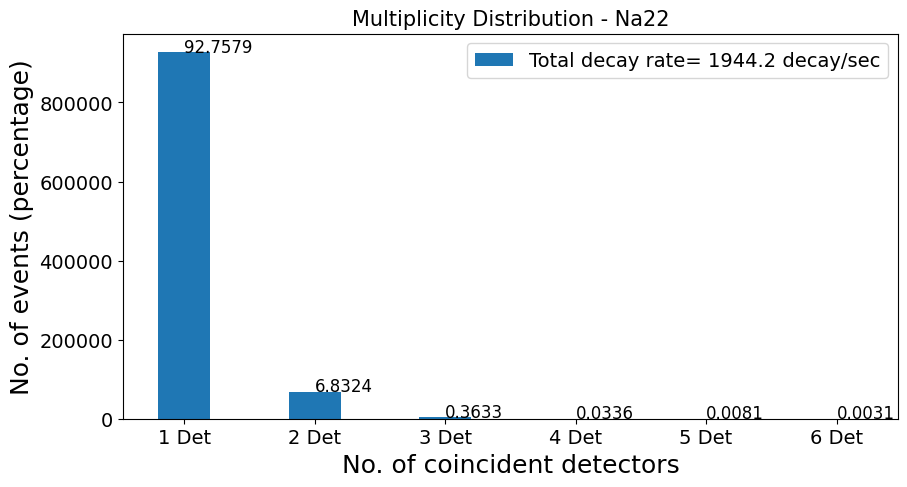

In [115]:
count = Multiplicity
total = count.sum()
count=count/count.sum()*1000000
count=np.array(count, dtype="float")
for j in range(len(count)):
    count[j]=round(count[j],2)
data_count = {'1 Det':count[1], '2 Det':count[2], '3 Det':count[3],
        '4 Det':count[4], '5 Det':count[5], '6 Det':count[6]}
courses = list(data_count.keys())
values = list(data_count.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values,
        width = 0.4, label="Total decay rate= %.1f decay/sec"%(total/(cut_data)))   #Change time here
values = count[1:7]/1e4
addlabels(courses, values)
plt.legend(fontsize=14)
label("No. of coincident detectors", "No. of events (percentage)", 8, 5)
plt.title("Multiplicity Distribution - Na22", fontsize="15")
plt.savefig("%s/Multiplicity.jpg"%(save_folder_each))

In [18]:
Multiplicity

array([0.000000e+00, 5.291738e+06, 8.566132e+06, 8.207540e+05,
       5.882700e+04, 3.659000e+03, 2.040000e+02, 1.600000e+01,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00])

In [27]:
count = 0
for k,j in enumerate(Timed_Energy_event):
    event_Channel = data[0][j]-30
    event_Energies = data[2][j]
    if 0 not in event_Channel:
        count+=1

In [116]:
count = 0
count_all = 0
Energy = []
for k,j in enumerate(Timed_Energy_event):
    event_Channel = data[0][j]
    event_Energies = data[2][j]
    if len(j)>=2 and 0 in event_Channel:
        count_all+=1
        energy = event_Energies[event_Channel == 0]
        Energy.extend(energy)
        if 511 - 2*34 <energy< 511 + 2*34:
            count+=1

In [70]:
count/len(Timed_Energy_event), count_all/len(Timed_Energy_event)

(0.2318115800948761, 0.6196161404703646)

In [149]:
dataT = data.T

In [170]:
count = np.zeros(nDet)
for j in range(len(data[0])):
    for i in range(1, 7):
        if data[0][j]-30== i and 511-68<data[2][j]<511+68:
            count[i]+=1

In [176]:
count_bkg_511 = count/3600

In [7]:
count_bkg_511 = np.array([ 0.        , 21.59027778, 21.47944444, 21.17833333, 21.46722222,
       22.08277778, 25.35166667])

In [181]:
def contribution_background(count_bkg_511):
    coincidence_window = 0.5e-6
    random_falling_in_window = count_bkg_511*coincidence_window
    Total_events = 16379.4 *900
    Ch0_triggered_511 = 0.23*Total_events
    Background_expected = Ch0_triggered_511 * random_falling_in_window
    return Background_expected

contribution_background(count_bkg_511)

array([ 0.        , 36.60130487, 36.41341268, 35.90294868, 36.39269274,
       37.43622431, 42.97786671])

In [9]:
count_pair_data = np.array([0, 1391504, 106260, 14021, 3047, 945, 425])

In [10]:
count_pair_data_new = count_pair_data - np.array(count_bkg_511, dtype = int)

In [ ]:
425

In [167]:
count/3600

22.08277777777778

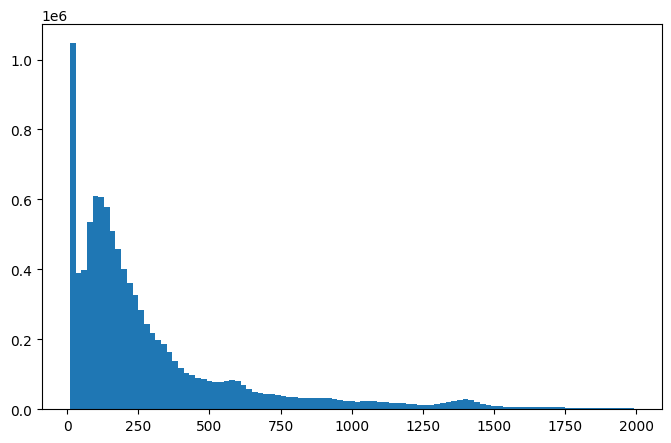

In [152]:
h = plt.hist(data[2], bins = np.arange(10, 2000, 20))

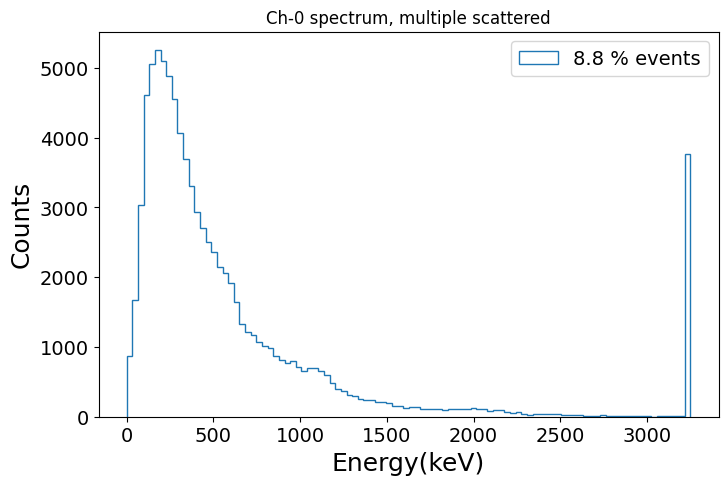

In [117]:
h = plt.hist(Energy, bins = 100, histtype = "step", label = "%.1f %% events"%(len(Energy)/1000000*100))
plt.legend(fontsize = 14)
label("Energy(keV)", "Counts", 8, 5)
plt.title("Ch-0 spectrum, multiple scattered")
plt.savefig("%s/Energy_Ch0_MultipleScattered.jpg"%(save_folder_each))

In [118]:
count = 0
count_1det = np.zeros(7)
for k,j in enumerate(Timed_Energy_event):
    event_Channel = data[0][j]-30
    event_Energies = data[2][j]
    if len(j)==1:
        count_1det[int(event_Channel[0])]+=1


In [119]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],np.round(y[i], 2),fontsize=12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


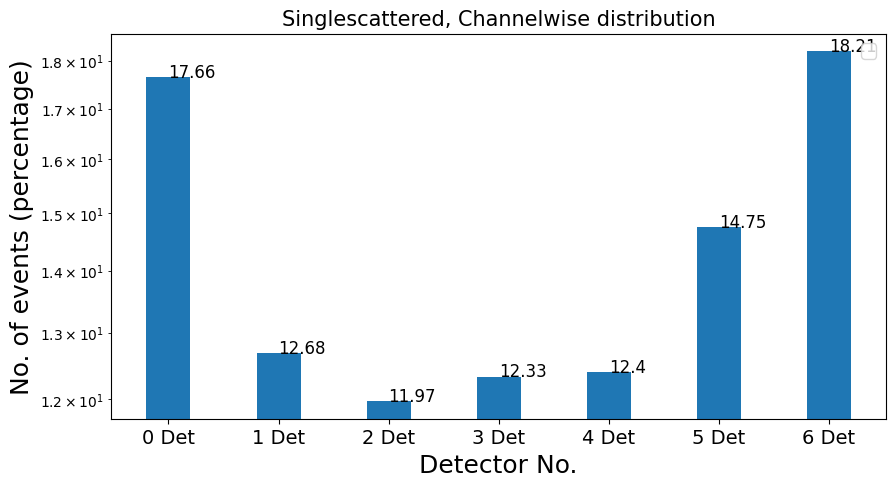

In [120]:
count = count_1det
total = count.sum()
count=count/count.sum()*100
data_count = {'0 Det':count[0], '1 Det':count[1], '2 Det':count[2], '3 Det':count[3],
        '4 Det':count[4], '5 Det':count[5], '6 Det':count[6]}
courses = list(data_count.keys())
values = list(data_count.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values,
        width = 0.4)   #Change time here
addlabels(courses, values)
plt.legend(fontsize=14)
plt.yscale("log")
label("Detector No.", "No. of events (percentage)", 8, 5)
plt.title("Singlescattered, Channelwise distribution", fontsize="15")
plt.savefig("%s/Count_1det.jpg"%(save_folder_each))

In [121]:
Coincident_energy = np.zeros((len(Timed_Energy_event), 7), dtype = float)
for k,j in enumerate(Timed_Energy_event):
    event_Channel = data[0][j]-30
    event_Energies = data[2][j]
    # Coincidence_energy
    if 0 in event_Channel:
        for l,i in enumerate(event_Channel):
            Coincident_energy[k, int(i)] = event_Energies[l]

In [122]:
triggered = Coincident_energy[Coincident_energy[:, 0]!=0]
len(triggered)

1234470

In [123]:
count_pair = np.zeros(7)
for i in range(1, 7):
    filtered_rows = triggered[triggered[:, i] != 0]
    selected_columns = filtered_rows[:, [0, i]]
    for j,k in enumerate(selected_columns):
        if 511 - 2*34 <k[0]< 511 + 2*34 and 511 - 2*34 <k[1]< 511 + 2*34:
            count_pair[i] += 1

In [124]:
multiplicity_coin0 = np.zeros(7)
for k,j in enumerate(triggered):
    filtered_rows = j[np.nonzero(j)]
    if 511 - 2*34 <j[0]< 511 + 2*34:
        multiplicity_coin0[len(filtered_rows)-1] += 1

In [3]:
count_pair = np.array([0, 1391504, 106260, 14021, 3047, 945, 425])
count_pair.sum()

1516202

In [142]:
multiplicity_coin0

array([7.2209e+04, 8.7810e+03, 7.2200e+02, 7.0000e+01, 2.2000e+01,
       5.0000e+00, 3.0000e+00])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


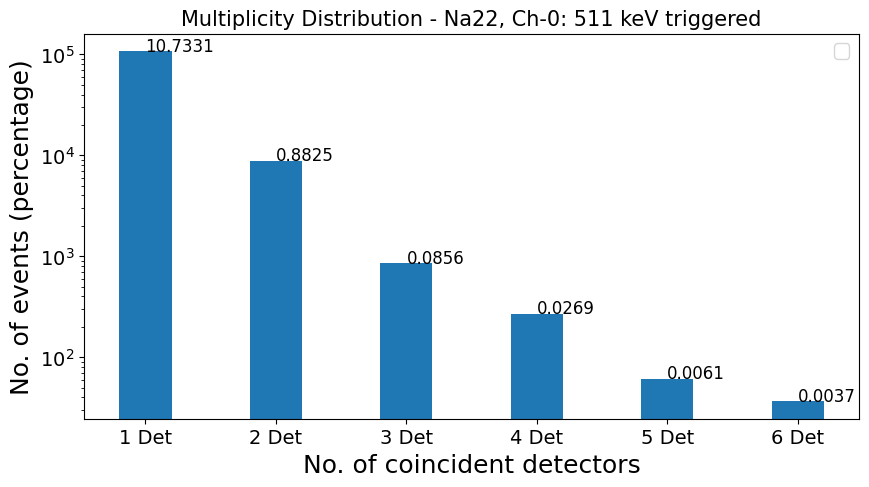

In [143]:
count = multiplicity_coin0
total = count.sum()
count=count/total*1000000
count=np.array(count, dtype="float")
for j in range(len(count)):
    count[j]=round(count[j],2)
data_count = {'1 Det':count[1], '2 Det':count[2], '3 Det':count[3],
        '4 Det':count[4], '5 Det':count[5], '6 Det':count[6]}
courses = list(data_count.keys())
values = list(data_count.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values,
        width = 0.4)   #Change time here
values = count[1:7]/1e4
addlabels(courses, values)
plt.legend(fontsize=14)
plt.yscale("log")
label("No. of coincident detectors", "No. of events (percentage)", 8, 5)
plt.title("Multiplicity Distribution - Na22, Ch-0: 511 keV triggered", fontsize="15")
plt.savefig("%s/Multiplicity_Coin0.jpg"%(save_folder_each))

In [127]:
len(Coincident_energy)

14741330

In [129]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]*1e4,np.round(y[i], 4),fontsize=12)

In [134]:
count_pair

array([  0., 780., 182.,  44.,  24.,  13.,   4.])

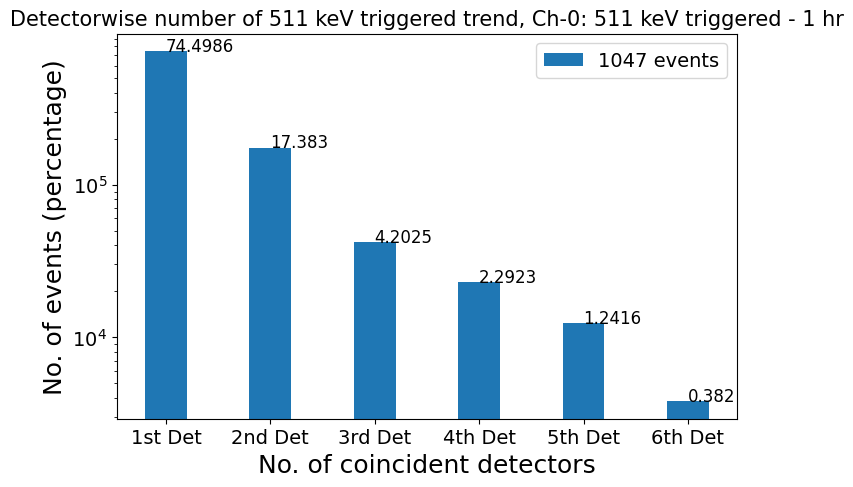

In [136]:
count = count_pair
total = count.sum()
count=count/count.sum()*1000000
count=np.array(count, dtype="float")
for j in range(len(count)):
    count[j]=round(count[j],2)
data_count = {'1st Det':count[1], '2nd Det':count[2], '3rd Det':count[3],
        '4th Det':count[4], '5th Det':count[5], '6th Det':count[6]}
courses = list(data_count.keys())
values = list(data_count.values())
# fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values,
        width = 0.4, label = "%d events"%total)   #Change time here
values = count[1:7]/1e4
addlabels(courses, values)
plt.legend(fontsize=14)
plt.yscale("log")
label("No. of coincident detectors", "No. of events (percentage)", 8, 5)
plt.title("Detectorwise number of 511 keV triggered trend, Ch-0: 511 keV triggered - 1 hr", fontsize="15")
plt.savefig("%s/Event_Detector.jpg"%(save_folder_each))

In [31]:
def exponential(x, a, b, c, d, e):
    return a*np.exp(-x*b)
from scipy.optimize import curve_fit
# popt, pcov = curve_fit(exponential, np.arange(1,7), count_pair[1:7])


In [123]:
exponential(np.arange(1,7), *popt), popt

(array([1.39146749e+06, 1.07192601e+05, 8.25765161e+03, 6.36133550e+02,
        4.90049609e+01, 3.77512896e+00]),
 array([1.80626439e+07, 2.56348699e+00, 1.00000000e+00]))

In [12]:
det = np.arange(1,7)
det1 = np.arange(1, 6)

In [188]:
count_pair

array([      0, 1391504,  106260,   14021,    3047,     945,     425])

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
count_pair = np.array([92.6, 6.43, 0.785, 0.139, 0.0372, 0.0136, 0.00712, 0.00456, 0.00304, 0.00198, 0.00134, 0.00107])
det = np.arange(1, 13)
count_pair_sim = np.array([83.1, 14.7, 1.75, 0.308, 0.0904, 0.0335, 0.0202, 0.0123, 0.00905, 0.0077, 0.0070, 0.00486])

Text(0.5, 1.0, '511 keV gamma penetration potential (Data)')

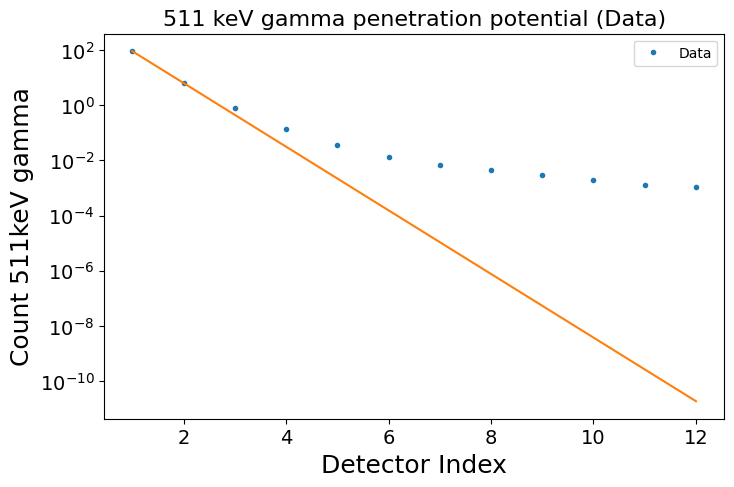

In [32]:
plt.plot(det, count_pair, ".", label = "Data")
# plt.plot(np.arange(1, 7), count_pair_data_new[1:7], ".", label = "Data after background cut")

popt, pcov = curve_fit(exponential, det, count_pair)
plt.plot(det, exponential(det, *popt))

# plt.plot(np.linspace(1, 6, 101), exponential(np.linspace(1, 6, 101), *popt), )
plt.yscale("log")
plt.legend()
label("Detector Index", "Count 511keV gamma", 8, 5)
plt.title("511 keV gamma penetration potential (Data)", fontsize = 16)
# plt.savefig("%s/Event_Detector_fitData.jpg"%(save_folder_each))

In [33]:
popt

array([1.32361512e+03, 2.65985122e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00])

In [31]:
popt, pcov = curve_fit(exponential, det, count_data[1:7])

In [29]:
count_data = count_pair_data_new/sum(count_pair_data_new)*100

In [32]:
popt2, popt

(array([239.0714638,   1.1923659,   1.       ]),
 array([1.19164585e+03, 2.56369868e+00, 1.00000000e+00]))

In [19]:
count_pair_sim

array([8.31e+01, 1.47e+01, 1.75e+00, 3.08e-01, 9.04e-02, 3.35e-02,
       2.02e-02, 1.23e-02, 9.05e-03, 7.70e-03, 7.00e-03, 4.86e-03])

Text(0.5, 1.0, '511 keV gamma penetration potential (Simulation)')

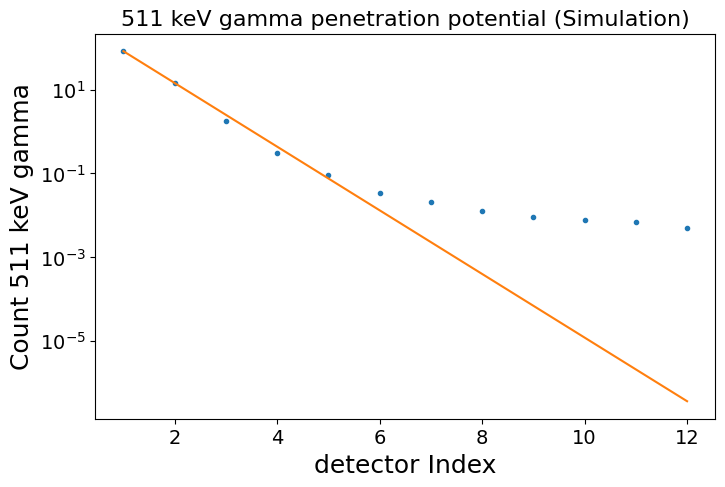

In [34]:
# count_pair_sim = np.array([72, 25.5, 1.9, 0.2, 0.06, 0.02])
plt.plot(det, count_pair_sim, ".")
popt, pcov = curve_fit(exponential, det, count_pair_sim)
plt.plot(det, exponential(det, *popt))
plt.yscale("log")
label("detector Index", "Count 511 keV gamma", 8, 5)
plt.title('511 keV gamma penetration potential (Simulation)', fontsize = 16)
# plt.savefig("%s/Event_Detector_fitSim.jpg"%(save_folder_each))

In [35]:
popt

array([478.92712866,   1.7512152 ,   1.        ,   1.        ,
         1.        ])

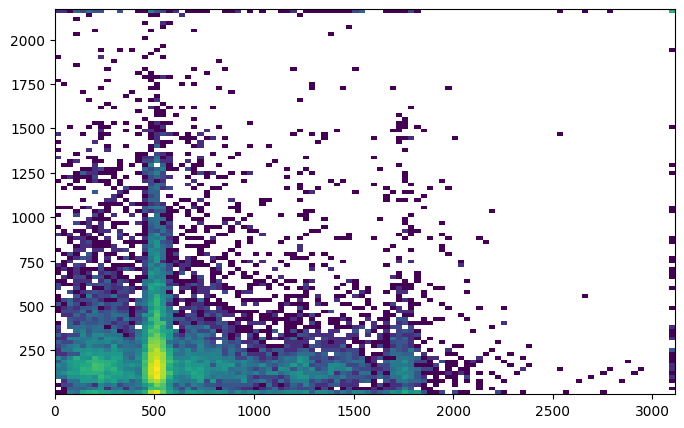

In [75]:
i = 6
filtered_rows = Coincident_energy[Coincident_energy[:, i] != 0]
selected_columns = filtered_rows[:, [0, i]]
h = plt.hist2d(selected_columns[:, 0], selected_columns[:, 1], bins = (100, 100),norm=LogNorm())

In [48]:
Coincident_energy = [[] for _ in range(6)]
det_pair = [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6]]
for k,j in enumerate(Timed_Energy_event):
    if 0 in event_Channel:
        event_Channel = data[0][j]-30
        event_Energies = data[2][j]
        event_in_csiCh = np.array([ch in csiCh_set for ch in event_Channel])

(178.08502994011977, array([1.]))

In [49]:
j

array([15])

In [153]:
f = open('%s/Output_Run_%d_%d.pickle'%(save_folder, folder_index, index), 'rb')
dat = pickle.load(f)

# sigma=dat['sigma']

In [ ]:
'Multiplicity':Multiplicity,'multiplicity_coin0':multiplicity_coin0, 'count_pair':count_pair

In [154]:
Multiplicity=dat['Multiplicity']
multiplicity_coin0=dat['multiplicity_coin0']
count_pair=dat['count_pair']

In [155]:
Multiplicity

array([0.00000e+00, 5.29645e+05, 8.57145e+05, 8.18780e+04, 5.84800e+03,
       3.89000e+02, 1.50000e+01, 3.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])

In [28]:
def exponential(x, a, b, c):
    return c+a*np.exp(-x*b)


In [3]:
import pickle

In [4]:
save_folder = "../ASCID_efficiency/Figures/Pb_2inch/"
save_folder_each = "%s/Result"%save_folder

f = open('%s/Result_Run.pickle'%(save_folder_each), 'rb')
dat = pickle.load(f)
count_pair_data = dat['count_pair'] 

In [23]:
save_folder = '../Simulation/Efficiency/Figures/Crystal12/Output_2'

f = open('%s/Output_Run_2.pickle'%(save_folder), 'rb')
dat = pickle.load(f)
count_pair_sim = dat['count_pair'] 

In [36]:
count_pair_data = count_pair_data/count_pair_data.sum()*100
count_pair_sim = count_pair_sim/count_pair_sim.sum()*100

In [39]:
count_pair_data, count_pair_sim

(array([0.00000000e+00, 9.25752165e+01, 6.43109345e+00, 7.84952877e-01,
        1.38822504e-01, 3.72199743e-02, 1.35867328e-02, 7.11854458e-03,
        4.55793661e-03, 3.04225262e-03, 1.97828055e-03, 1.34425116e-03,
        1.06669323e-03]),
 array([0.00000000e+00, 8.30867448e+01, 1.46670307e+01, 1.75277319e+00,
        3.08397723e-01, 9.03576157e-02, 3.35101091e-02, 2.01958247e-02,
        1.23418929e-02, 9.05072144e-03, 7.70433313e-03, 7.03113897e-03,
        4.86195780e-03]))

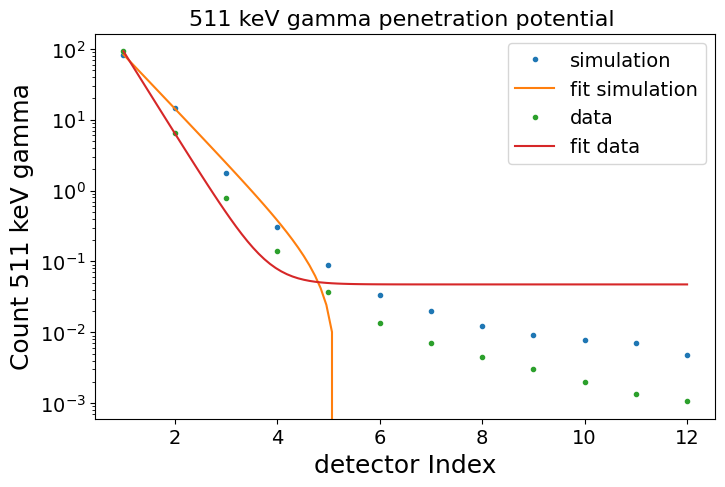

In [47]:
popt2, pcov2 = curve_fit(exponential, np.arange(1, 13), count_pair_sim[1:13])
plt.plot(np.arange(1, 13), count_pair_sim[1:13], ".", label = "simulation")
plt.plot(np.linspace(1, 12, 101), exponential(np.linspace(1, 12, 101), *popt2), label = "fit simulation")
# plt.yscale("log")

popt2, pcov2 = curve_fit(exponential, np.arange(1, 13), count_pair_data[1:13])
plt.plot(np.arange(1, 13), count_pair_data[1:13], ".", label = "data")
plt.plot(np.linspace(1, 12, 101), exponential(np.linspace(1, 12, 101), *popt2), label = "fit data")

plt.yscale("log")
plt.legend(fontsize = 14)
label("detector Index", "Count 511 keV gamma", 8, 5)
plt.title('511 keV gamma penetration potential ', fontsize = 16)
plt.savefig("%s/Event_Detector_fit_log_fit.jpg"%(save_folder))

C:\Users\sharada\AppData\Local\Temp\ipykernel_10888\4127798136.py:2: RuntimeWarning: overflow encountered in exp
  return c+a*np.exp(-x*b)


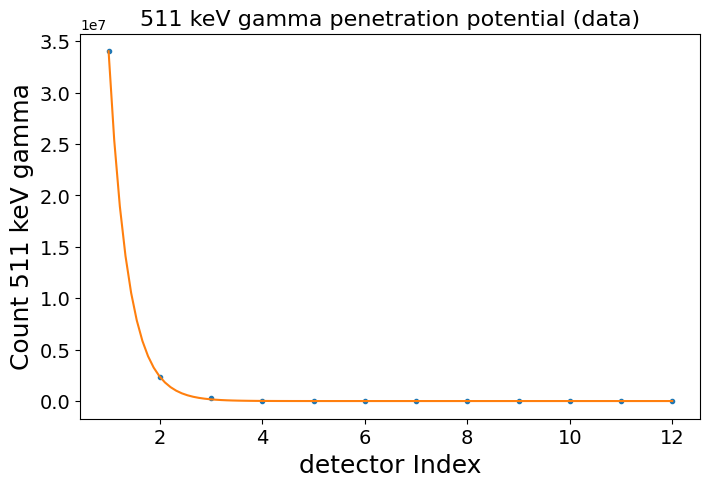

In [33]:
popt2, pcov2 = curve_fit(exponential, np.arange(1, 13), count_pair_data[1:13])
plt.plot(np.arange(1, 13), count_pair_data[1:13], ".")
plt.plot(np.linspace(1, 12, 101), exponential(np.linspace(1, 12, 101), *popt2))
# plt.yscale("log")
label("detector Index", "Count 511 keV gamma", 8, 5)
plt.title('511 keV gamma penetration potential (data)', fontsize = 16)
plt.savefig("%s/Event_Detector_fit.jpg"%(save_folder_each))